## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from scipy.stats import norm
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('Employee Satisfaction Index.csv')
df.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [4]:
df=df.set_index('emp_id')
df.head()

,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
emp_id,,,,,,,,,,,,
HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, HR8270 to TECH7731
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               500 non-null    int64 
 1   Dept              500 non-null    object
 2   location          500 non-null    object
 3   education         500 non-null    object
 4   recruitment_type  500 non-null    object
 5   job_level         500 non-null    int64 
 6   rating            500 non-null    int64 
 7   onsite            500 non-null    int64 
 8   awards            500 non-null    int64 
 9   certifications    500 non-null    int64 
 10  salary            500 non-null    int64 
 11  satisfied         500 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 50.8+ KB


In [6]:
df.describe()

,age,job_level,rating,onsite,awards,certifications,salary,satisfied
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,38.610000,3.032000,3.072000,0.466000,4.538000,0.496000,50416.056000,0.526000
std,9.438648,1.423738,1.425089,0.499342,2.853215,0.500485,23671.392661,0.499824
min,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24076.000000,0.000000
25%,30.000000,2.000000,2.000000,0.000000,2.000000,0.000000,29805.000000,0.000000
50%,39.000000,3.000000,3.000000,0.000000,5.000000,0.000000,42419.000000,1.000000
75%,47.000000,4.000000,4.000000,1.000000,7.000000,1.000000,65715.000000,1.000000
max,54.000000,5.000000,5.000000,1.000000,9.000000,1.000000,86750.000000,1.000000


<AxesSubplot:>

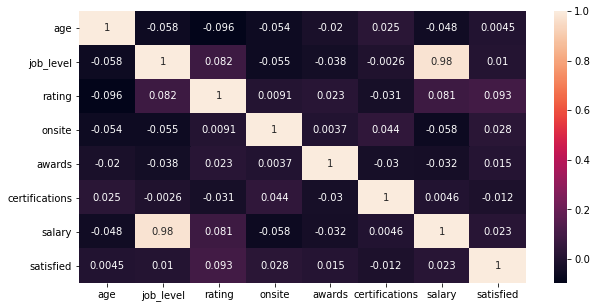

In [7]:
plt.figure(1, figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

In [8]:
df.location = df.location.astype('category')
df.Dept = df.Dept.astype('category')
df.recruitment_type =  df.recruitment_type.astype('category')
df.education = df.education.astype('category')


location_d = dict(enumerate(df.location.cat.categories))
Dept_d = dict(enumerate(df.Dept.cat.categories))
recruitment_type_d = dict(enumerate(df.recruitment_type.cat.categories))
education_d = dict(enumerate(df.education.cat.categories))


df.location = df.location.cat.codes
df.Dept = df.Dept.cat.codes
df.recruitment_type = df.recruitment_type.cat.codes
df.education = df.education.cat.codes

## Bar Plot for each feature

In [9]:
def bar_plot(variable):
    var=df[variable]
    varValue=var.value_counts()
    
    plt.figure(figsize=(10,4))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

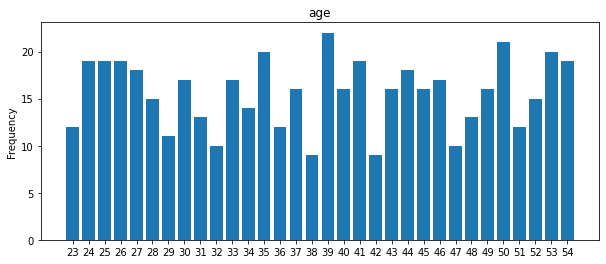

age:
39    22
50    21
35    20
53    20
54    19
25    19
41    19
26    19
24    19
44    18
27    18
46    17
30    17
33    17
45    16
43    16
40    16
49    16
37    16
52    15
28    15
34    14
48    13
31    13
23    12
36    12
51    12
29    11
32    10
47    10
42     9
38     9
Name: age, dtype: int64


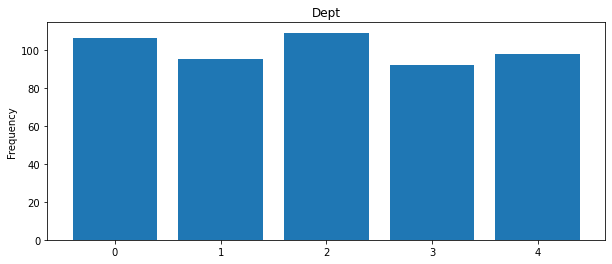

Dept:
2    109
0    106
4     98
1     95
3     92
Name: Dept, dtype: int64


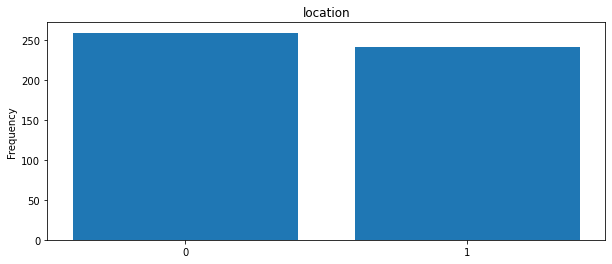

location:
0    259
1    241
Name: location, dtype: int64


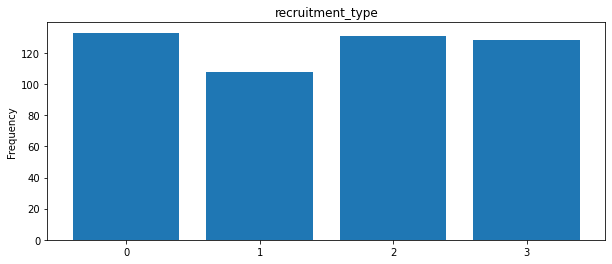

recruitment_type:
0    133
2    131
3    128
1    108
Name: recruitment_type, dtype: int64


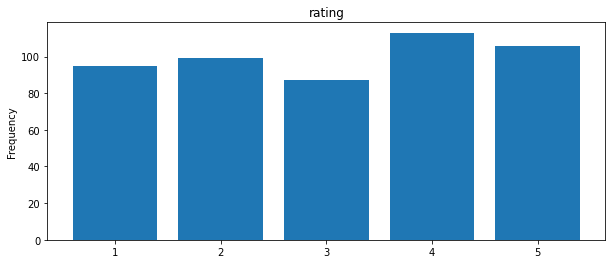

rating:
4    113
5    106
2     99
1     95
3     87
Name: rating, dtype: int64


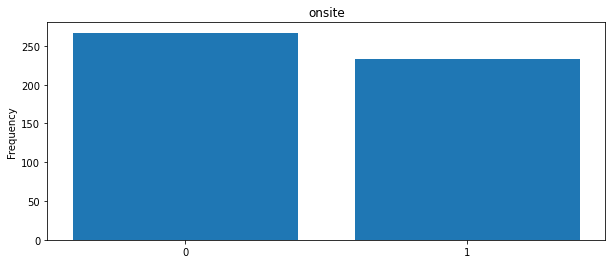

onsite:
0    267
1    233
Name: onsite, dtype: int64


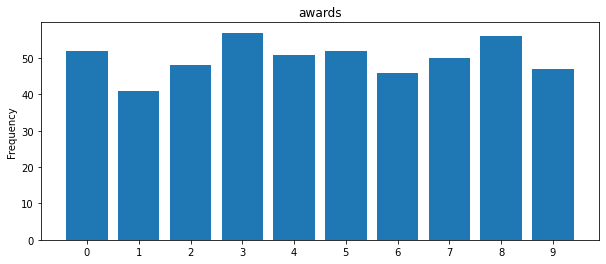

awards:
3    57
8    56
5    52
0    52
4    51
7    50
2    48
9    47
6    46
1    41
Name: awards, dtype: int64


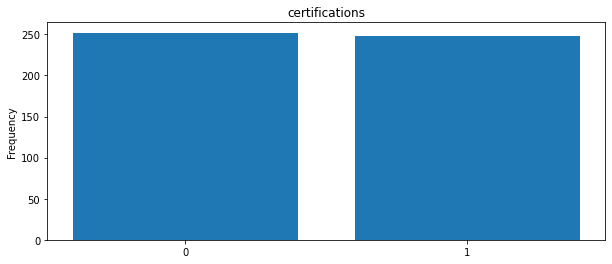

certifications:
0    252
1    248
Name: certifications, dtype: int64


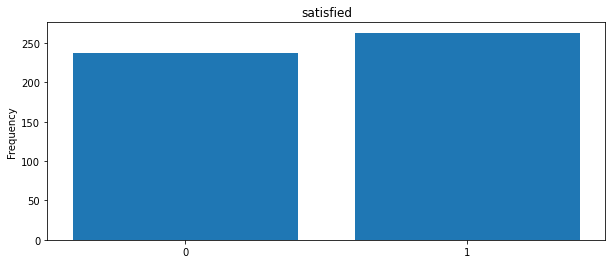

satisfied:
1    263
0    237
Name: satisfied, dtype: int64


In [10]:
features=['age', 'Dept', 'location', 'recruitment_type','rating','onsite','awards','certifications','satisfied']
for i in features:
    bar_plot(i)

C:\Users\ysavi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

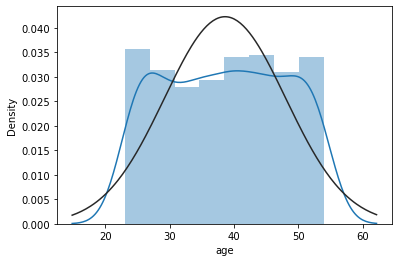

In [11]:
sns.distplot(df['age'],fit=norm)

C:\Users\ysavi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

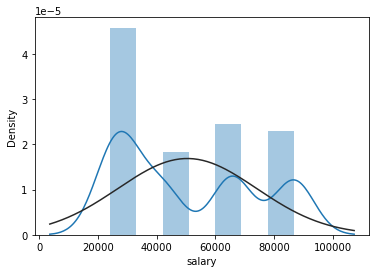

In [12]:
sns.distplot(df['salary'],fit=norm)

## Pair plot for each feature

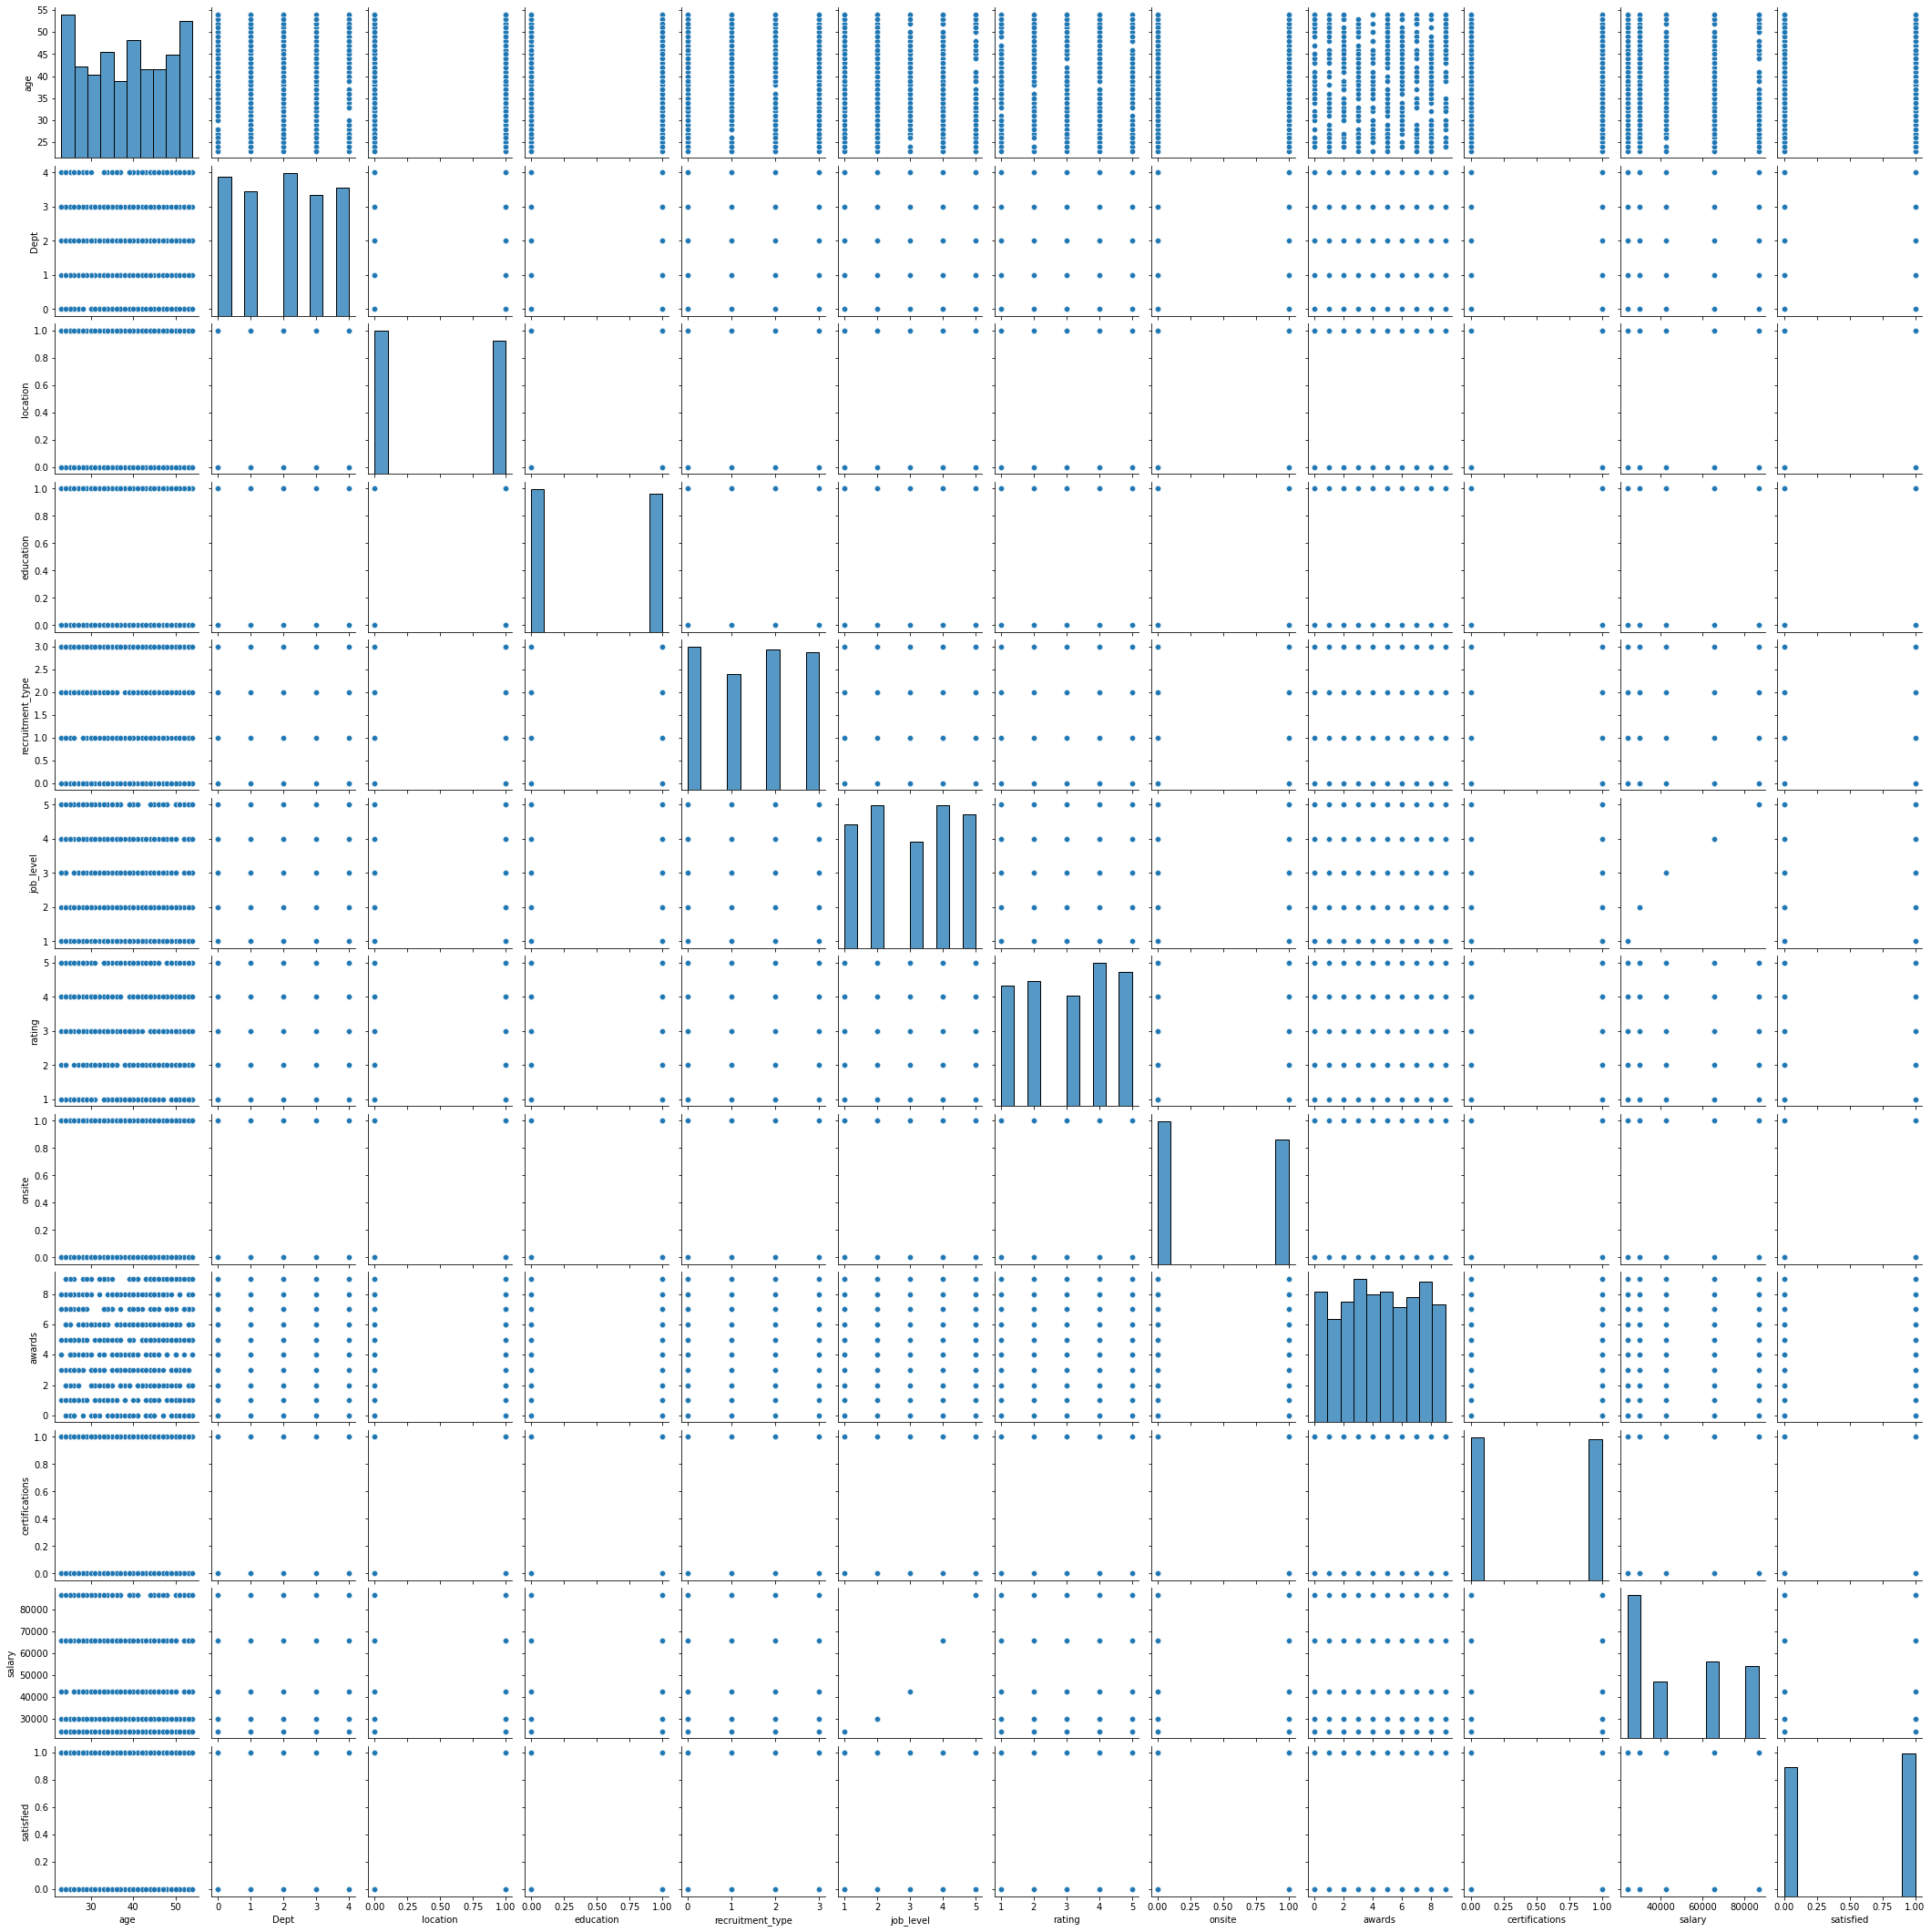

In [13]:
sns.pairplot(df)

From this pairplot graph, job_level and salary have a strong positive correlation.

## Histogram for each feature

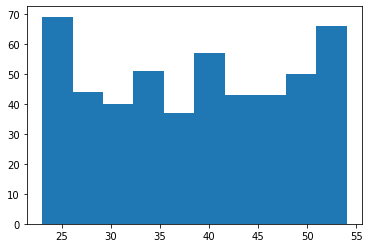

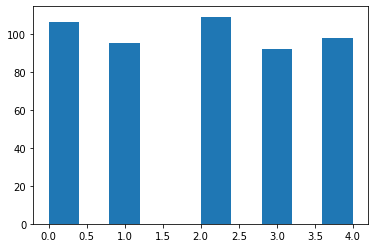

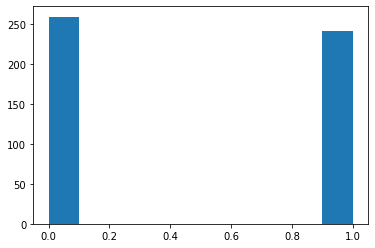

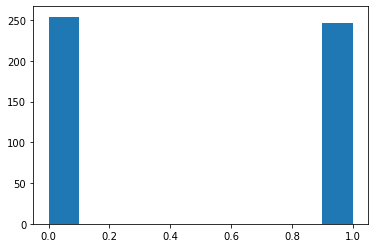

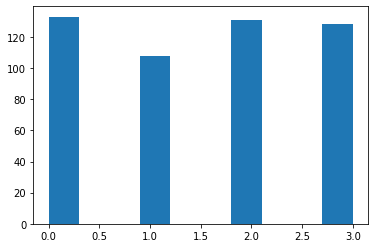

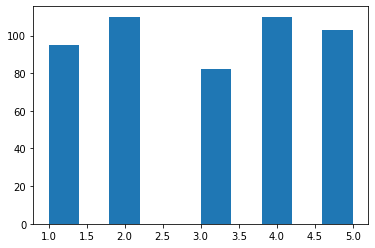

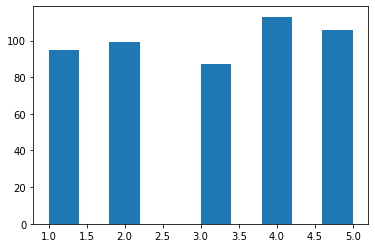

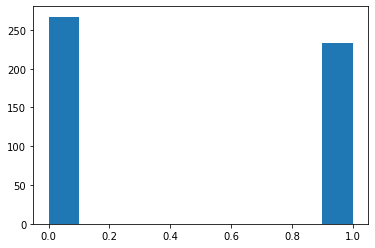

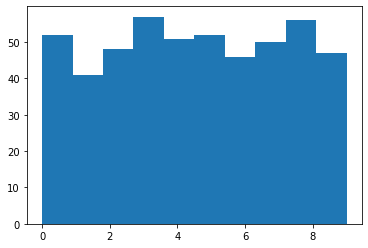

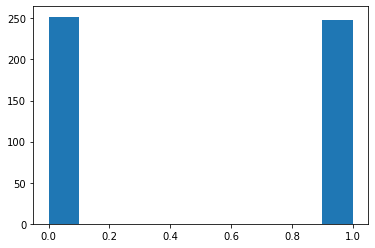

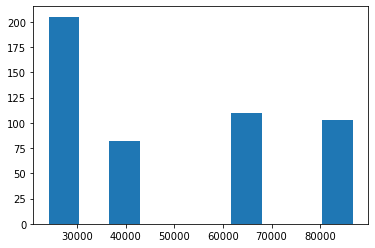

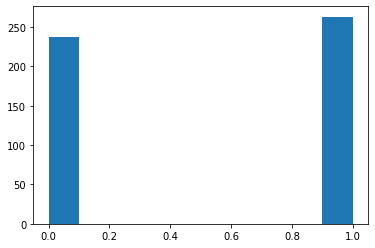

In [14]:
df.head()
for i in df.columns:
        plt.figure()
        plt.hist(df[i])

## Train/Test Split 

In [15]:
X=df[['age','rating','onsite','awards','certifications','salary']]
y= df['satisfied']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
y_train

emp_id
PUR7938     1
HR7457      0
HR5859      0
MKT5946     1
PUR1466     0
           ..
TECH3368    0
SAL1659     1
TECH3790    0
HR9226      0
TECH2707    0
Name: satisfied, Length: 400, dtype: int64

In [18]:
print(f'Shape of X_test is: ',X_test.shape)
print(f'Shape of X_train is: ',X_train.shape)
print(f'Shape of y_test is: ',y_test.shape)
print(f'Shape of y_train is: ',y_train.shape)

Shape of X_test is:  (100, 6)
Shape of X_train is:  (400, 6)
Shape of y_test is:  (100,)
Shape of y_train is:  (400,)


## Linear Regression for Multiple feature

In [19]:
print(df.shape)
print(df.size)

(500, 12)
6000


In [20]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,4.176463e-04
rating,2.575489e-02
onsite,1.056328e-02
awards,-2.390059e-03
certifications,7.636551e-03
salary,4.840658e-07


In [22]:
regressor.intercept_

0.40381855160389946

In [23]:
y_pred = regressor.predict(X_train)
y_pred

array([0.52844409, 0.48833991, 0.58545658, 0.55344675, 0.58066442,
       0.51857309, 0.48559389, 0.4794644 , 0.50255685, 0.46653877,
       0.51623445, 0.44210874, 0.47852886, 0.54198934, 0.49784372,
       0.49248243, 0.52145992, 0.48368993, 0.50494691, 0.57178066,
       0.51813162, 0.537506  , 0.52052168, 0.51001499, 0.48798222,
       0.5137773 , 0.5125728 , 0.43460224, 0.54480559, 0.49110782,
       0.53839158, 0.49866304, 0.54110264, 0.52742279, 0.51953487,
       0.55157409, 0.51141185, 0.52903122, 0.52486818, 0.49654308,
       0.57630195, 0.50200991, 0.47929397, 0.52313051, 0.5129389 ,
       0.44583306, 0.52218215, 0.48780644, 0.55510447, 0.50922881,
       0.47804176, 0.48393444, 0.52025744, 0.56117422, 0.47446861,
       0.49224484, 0.54561088, 0.53270991, 0.56653727, 0.48711663,
       0.60053484, 0.4834552 , 0.49418475, 0.46577047, 0.54869046,
       0.52493608, 0.56335755, 0.50468234, 0.53106035, 0.57751746,
       0.45950267, 0.43767607, 0.50558553, 0.55187912, 0.52650

In [24]:
len(y_pred)

400

In [25]:
X.iloc[:,:-1].corr()

,age,rating,onsite,awards,certifications
age,1.000000,-0.096388,-0.054055,-0.019875,0.025335
rating,-0.096388,1.000000,0.009079,0.022983,-0.030503
onsite,-0.054055,0.009079,1.000000,0.003722,0.043558
awards,-0.019875,0.022983,0.003722,1.000000,-0.030066
certifications,0.025335,-0.030503,0.043558,-0.030066,1.000000


In [26]:
# Model evaluation metrics - Regression problems

y_pred = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.49179637442384655
Mean Squared Error: 0.24417714140960212
Root Mean Squared Error: 0.494142835028094


In [27]:
df.head()

,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
emp_id,,,,,,,,,,,,
HR8270,28,0,1,0,2,5,2,0,1,0,86750,1
TECH1860,50,4,1,0,3,3,5,1,2,1,42419,0
TECH6390,43,4,1,1,2,4,1,0,2,0,65715,0
SAL6191,44,3,0,0,0,2,3,1,0,0,29805,1
HR6734,33,0,0,1,1,2,1,0,5,0,29805,1


In [28]:
df.shape

(500, 12)

In [29]:
X.head()

,age,rating,onsite,awards,certifications,salary
emp_id,,,,,,
HR8270,28,2,0,1,0,86750
TECH1860,50,5,1,2,1,42419
TECH6390,43,1,0,2,0,65715
SAL6191,44,3,1,0,0,29805
HR6734,33,1,0,5,0,29805


In [30]:
y.head()

emp_id
HR8270      1
TECH1860    0
TECH6390    0
SAL6191     1
HR6734      1
Name: satisfied, dtype: int64

In [31]:
y_pred=regressor.predict(X_test)
print(y_pred)

[0.52273113 0.53683445 0.4698657  0.57983486 0.50274286 0.59169098
 0.53930026 0.45161622 0.48017882 0.47215418 0.60000137 0.57196667
 0.45904933 0.57860265 0.48964387 0.47188684 0.55298054 0.48253318
 0.48463968 0.47762412 0.5192766  0.50113443 0.51686857 0.49347097
 0.58644758 0.48063096 0.56971316 0.50069308 0.58921539 0.47260853
 0.56844269 0.49294778 0.54642688 0.49143066 0.48874187 0.57076842
 0.56755823 0.48692815 0.52110617 0.54195226 0.53368165 0.56850969
 0.50409244 0.52482531 0.45153489 0.58742864 0.50583892 0.56909783
 0.4523     0.57432954 0.52264267 0.53682084 0.54162362 0.54990351
 0.52416973 0.54962909 0.56612558 0.45806692 0.56210781 0.52956778
 0.46200855 0.53673796 0.51857309 0.49904895 0.50403425 0.5706526
 0.54781848 0.47029932 0.52169329 0.49340268 0.58719425 0.53543136
 0.56756104 0.55212672 0.54885264 0.55276314 0.49493673 0.48537895
 0.44298249 0.46869409 0.53563344 0.58700504 0.57756692 0.57081129
 0.5873316  0.56097059 0.57705137 0.51818264 0.53288962 0.56257

In [32]:
len(y_pred)

100

In [33]:
score = r2_score(y_test, y_pred)
print(score)

0.013425691274334906


### Confusion Matrix for Linear Regression

In [34]:
y_test

emp_id
PUR7184    0
SAL4446    0
MKT1190    0
MKT3786    1
SAL1728    1
          ..
MKT8805    0
PUR7873    1
MKT8164    0
MKT1995    1
HR2802     0
Name: satisfied, Length: 100, dtype: int64

In [35]:
y_pred

array([0.52273113, 0.53683445, 0.4698657 , 0.57983486, 0.50274286,
       0.59169098, 0.53930026, 0.45161622, 0.48017882, 0.47215418,
       0.60000137, 0.57196667, 0.45904933, 0.57860265, 0.48964387,
       0.47188684, 0.55298054, 0.48253318, 0.48463968, 0.47762412,
       0.5192766 , 0.50113443, 0.51686857, 0.49347097, 0.58644758,
       0.48063096, 0.56971316, 0.50069308, 0.58921539, 0.47260853,
       0.56844269, 0.49294778, 0.54642688, 0.49143066, 0.48874187,
       0.57076842, 0.56755823, 0.48692815, 0.52110617, 0.54195226,
       0.53368165, 0.56850969, 0.50409244, 0.52482531, 0.45153489,
       0.58742864, 0.50583892, 0.56909783, 0.4523    , 0.57432954,
       0.52264267, 0.53682084, 0.54162362, 0.54990351, 0.52416973,
       0.54962909, 0.56612558, 0.45806692, 0.56210781, 0.52956778,
       0.46200855, 0.53673796, 0.51857309, 0.49904895, 0.50403425,
       0.5706526 , 0.54781848, 0.47029932, 0.52169329, 0.49340268,
       0.58719425, 0.53543136, 0.56756104, 0.55212672, 0.54885

In [36]:
np.array(np.unique(y_test, return_counts=True)).T

array([[ 0, 45],
       [ 1, 55]], dtype=int64)

In [37]:
np.array(np.unique(y_pred, return_counts=True)).T

array([[0.44298249, 1.        ],
       [0.45153489, 1.        ],
       [0.45161622, 1.        ],
       [0.4523    , 1.        ],
       [0.45806692, 1.        ],
       [0.45904933, 1.        ],
       [0.46200855, 1.        ],
       [0.46869409, 1.        ],
       [0.4698657 , 1.        ],
       [0.47029932, 1.        ],
       [0.47188684, 1.        ],
       [0.47215418, 1.        ],
       [0.47260853, 1.        ],
       [0.47762412, 1.        ],
       [0.48017882, 1.        ],
       [0.48063096, 1.        ],
       [0.48133657, 1.        ],
       [0.48253318, 1.        ],
       [0.48463968, 1.        ],
       [0.48537895, 1.        ],
       [0.48692815, 1.        ],
       [0.48874187, 1.        ],
       [0.48964387, 1.        ],
       [0.49143066, 1.        ],
       [0.49208305, 1.        ],
       [0.49294778, 1.        ],
       [0.49340268, 1.        ],
       [0.49347097, 1.        ],
       [0.49493673, 1.        ],
       [0.49904895, 1.        ],
       [0.

In [38]:
y_test = y_test.astype('int')

In [39]:
y_pred = y_pred.astype('int')

In [40]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[45,  0],
       [55,  0]], dtype=int64)

In [41]:
accuracy_score(y_test, y_pred, normalize=False)

45

In [42]:
print("Accuracy", metrics.accuracy_score(y_test,y_pred))
print("Precision", metrics.precision_score(y_test,y_pred))
print("Recall", metrics.recall_score(y_test,y_pred))
print("f1_score", metrics.f1_score(y_test,y_pred))

Accuracy 0.45
Precision 0.0
Recall 0.0
f1_score 0.0


C:\Users\ysavi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ROC and ROC_AUC curve Linear Regression

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score for Linear Regression: ', roc_auc_score(y_test, y_pred))

roc_auc_score for Linear Regression:  0.5


In [44]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)

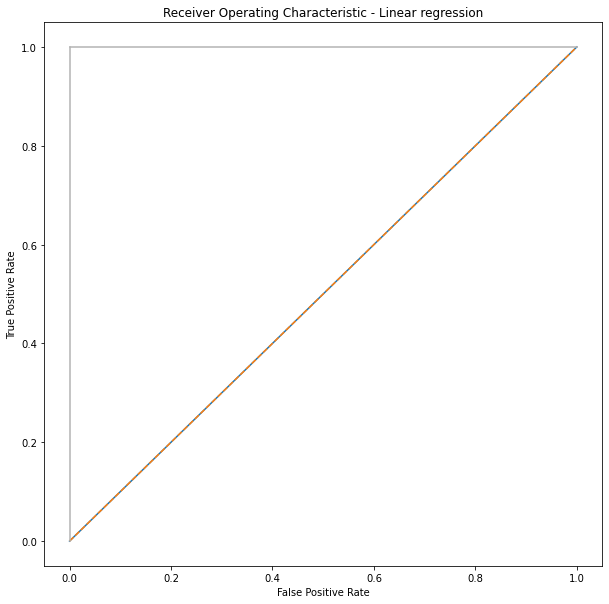

In [45]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Linear regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = logreg.predict(X_test)

### Confusion Matrix for Logistic Regression

In [49]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [50]:
y_test

emp_id
PUR7184    0
SAL4446    0
MKT1190    0
MKT3786    1
SAL1728    1
          ..
MKT8805    0
PUR7873    1
MKT8164    0
MKT1995    1
HR2802     0
Name: satisfied, Length: 100, dtype: int32

In [51]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 0, 45],
       [ 0, 55]], dtype=int64)

In [52]:
accuracy_score(y_test, y_pred, normalize=False)

55

In [53]:
print("Accuracy", metrics.accuracy_score(y_test,y_pred))
print("Precision", metrics.precision_score(y_test,y_pred))
print("Recall", metrics.recall_score(y_test,y_pred))
print("f1_score", metrics.f1_score(y_test,y_pred))

Accuracy 0.55
Precision 0.55
Recall 1.0
f1_score 0.7096774193548387


### ROC and ROC_AUC curve Logistic Regression

In [54]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_pred))

roc_auc_score for Logistic Regression:  0.5


In [55]:
false_positive_rate2, true_positive_rate2, threshold1 = roc_curve(y_test, y_pred)

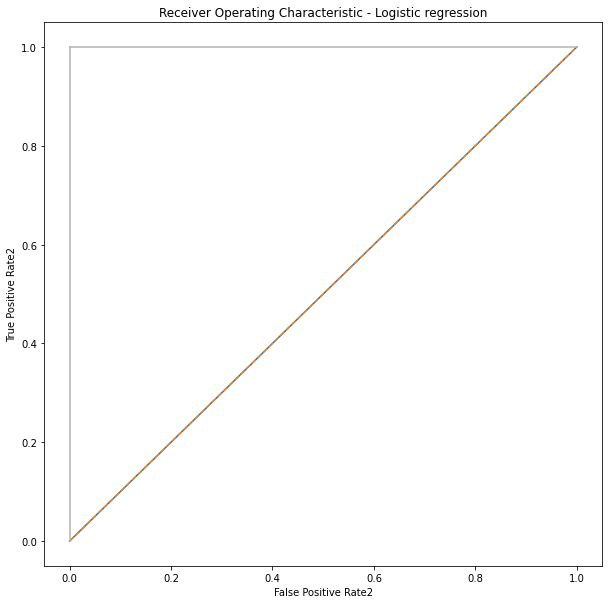

In [56]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate2')
plt.xlabel('False Positive Rate2')
plt.show()


## Applying Machine Learning Algorithms

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


### Decision Tree

In [84]:
X=df[['age','location','Dept','education','recruitment_type','rating','onsite','awards','certifications','salary']]
y= df['satisfied']

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 56.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.549708    0.572052    0.5625    0.560880      0.561327
recall       0.489583    0.629808    0.5625    0.559696      0.562500
f1-score     0.517906    0.599542    0.5625    0.558724      0.560357
support    192.000000  208.000000    0.5625  400.000000    400.000000
_______________________________________________
Confusion Matrix: 
 [[ 94  98]
 [ 77 131]]

Test Result:
Accuracy Score: 56.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.513514   0.587302      0.56    0.550408      0.554097
recall      0.422222   0.672727      0.56    0.547475      0.560000
f1-score    0.463415   0.627119      0.56    0.545267      0.553452
support    45.000000  55.000000      0.56  100.000000    100.000000
___

### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier 

In [88]:
X=df[['age','location','Dept','education','recruitment_type','rating','onsite','awards','certifications','salary']]
y= df['satisfied']

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
RF = RandomForestClassifier()

In [91]:
RF = RF.fit(X_train, y_train)

In [92]:
y_pred = RF.predict(X_test)

In [93]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test,y_pred))
print("Recall", metrics.recall_score(y_test,y_pred))
print("f1_score", metrics.f1_score(y_test,y_pred))

Accuracy: 0.53
Precision 0.5769230769230769
Recall 0.5454545454545454
f1_score 0.5607476635514018


## Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB 

In [95]:
X=df[['age','location','Dept','education','recruitment_type','rating','onsite','awards','certifications','salary']]
y= df['satisfied']

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [97]:
gnb = GaussianNB()

In [98]:
gnb.fit(X_train,y_train)

GaussianNB()

In [99]:
y_pred = gnb.predict(X_test)

In [100]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.55
